# Naive Bayes Classification with Scikit-Learn

## 1. Khai báo thư viện

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

## 2. Tải dữ liệu từ dataset

In [5]:
iris=datasets.load_iris()
class_name=iris.target_names
iris_df=pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target']=iris.target

In [6]:
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

**Nhận xét**	
+ datasets.load_iris(): Tải tập dữ liệu Iris từ Scikit-Learn, bao gồm: 
    - iris.data: Ma trận đặc trưng (150 mẫu × 4 đặc trưng).
    - iris.target: Nhãn lớp (0, 1, 2 tương ứng với Setosa, Versicolor, Virginica).
    - iris.feature_names: Tên các đặc trưng.
    - iris.target_names: Tên các lớp.
+ pd.DataFrame: Chuyển dữ liệu thành định dạng Pandas DataFrame để dễ xử lý và trực quan hóa.
+ iris_df['target']: Thêm cột nhãn (target) vào DataFrame.


## 3. Chia tập dữ liệu thành 80% tập train và 20% tập test

In [8]:
X_train, X_test, y_train, y_test=train_test_split(iris_df[['sepal length (cm)', 'sepal width (cm)','petal length (cm)', 'petal width (cm)']], iris_df['target'], test_size=0.2, random_state=2021)

**Nhận xét**
+ train_test_split: Chia dữ liệu thành tập huấn luyện (80%) và tập kiểm tra (20%). 
    - test_size=0.2: 20% dữ liệu (30 mẫu) được dùng để kiểm tra, 80% (120 mẫu) để huấn luyện.
    - random_state=2021: Đảm bảo việc chia dữ liệu có thể tái tạo, giúp kết quả nhất quán khi chạy lại.
+ X_train, X_test: Ma trận đặc trưng cho huấn luyện và kiểm tra.
+ y_train, y_test: Nhãn tương ứng.


## 4. Modelling

In [9]:
NB=GaussianNB()
# train
NB.fit(X_train,y_train)
print('Training accuracy: {:.2f}'.format(NB.score(X_train, y_train)))

# trên tập test
y_predict=NB.predict(X_test)
print('Test accuracy: {:.2f}'.format(NB.score(X_test, y_test)))


Training accuracy: 0.97
Test accuracy: 0.93


**Nhận xét**
+ GaussianNB(): Khởi tạo mô hình Gaussian Naive Bayes, giả định các đặc trưng tuân theo phân phối chuẩn.
+ fit(X_train, y_train): Huấn luyện mô hình bằng cách ước lượng: 
    - Xác suất tiên nghiệm (( P(C) )): Tỷ lệ mỗi lớp trong tập huấn luyện.
    - Mean và variance: Trung bình và phương sai của mỗi đặc trưng trong từng lớp.
+ score(X_train, y_train): Tính độ chính xác trên tập huấn luyện.
+ predict(X_test): Dự đoán nhãn cho tập kiểm tra.
+ score(X_test, y_test): Tính độ chính xác trên tập kiểm tra.

**Kết quả:** 
+ raining accuracy: 0.97 (97%)
+ Testing accuracy: 0.93 (93%)
+ Độ chính xác cao cho thấy mô hình hoạt động tốt, nhưng có sự khác biệt nhỏ giữa tập huấn luyện và kiểm tra, cho thấy mô hình không bị overfitting nghiêm trọng.


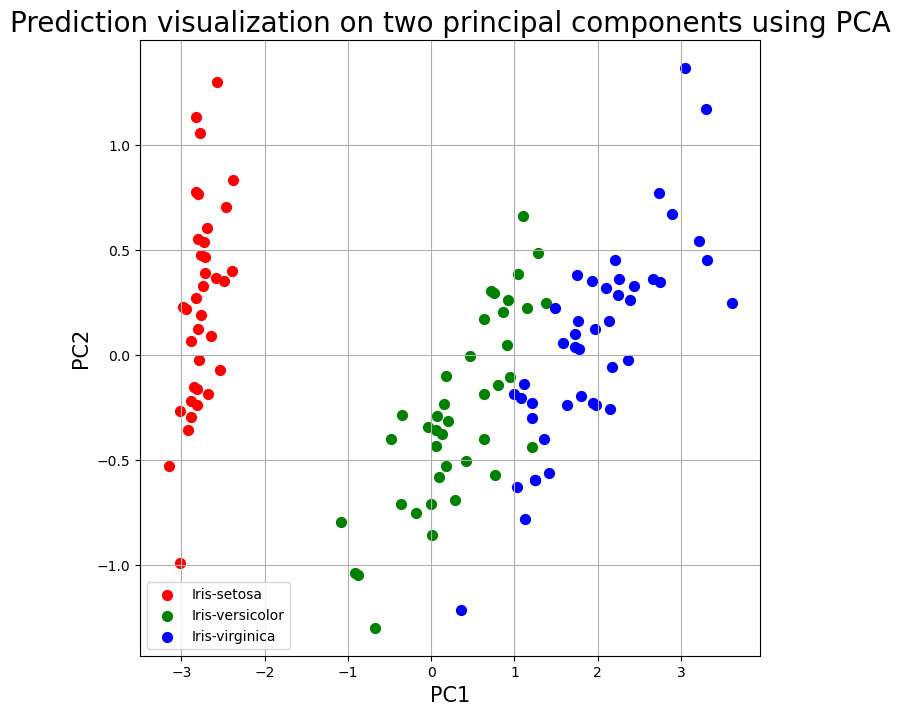

In [10]:
# Visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
finalDf = pd.concat([principalDf, y_train.reset_index(drop=True)], axis=1)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('Prediction visualization on two principal components using PCA',
 fontsize=20)
targets = [0, 1, 2]
targets_2_desc = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
 indicesToKeep = finalDf['target'] == target
 ax.scatter(finalDf.loc[indicesToKeep, 'PC1'],
 finalDf.loc[indicesToKeep, 'PC2'],
 c=color,
 s=50,
 label=targets_2_desc[target])
ax.legend()
ax.grid()

+ PCA (Principal Component Analysis): Giảm chiều dữ liệu từ 4 đặc trưng (sepal length, sepal width, petal length, petal width) xuống 2 chiều (PC1 và PC2) để trực quan hóa. 
    - PCA(n_components=2): Tạo hai thành phần chính (PC1, PC2) giữ lại phần lớn phương sai của dữ liệu.
    - fit_transform(X_train): Tính toán các thành phần chính và chuyển đổi dữ liệu huấn luyện.
+ principalDf: Lưu trữ dữ liệu sau khi giảm chiều thành DataFrame với hai cột PC1 và PC2.
+ pd.concat: Kết hợp dữ liệu PC1, PC2 với nhãn (y_train) để trực quan hóa.
+ Vẽ biểu đồ phân tán (scatter plot): 
    - Mỗi điểm đại diện cho một mẫu trong tập huấn luyện.
    - Màu sắc (r, g, b) đại diện cho ba lớp (Setosa, Versicolor, Virginica).
    - Biểu đồ cho thấy các lớp có thể phân tách tốt trong không gian 2 chiều, đặc biệt là Setosa thường tách biệt rõ ràng hơn Versicolor và Virginica.
+ Phân tích trực quan: 
+ Biểu đồ PCA cho thấy các cụm (clusters) của ba loài hoa: 
    - Setosa (0): Thường tách biệt rõ ràng, dễ phân loại.
    - Versicolor (1) và Virginica (2): Có thể chồng lấn một chút, dẫn đến một số lỗi phân loại (giải thích độ chính xác 93% thay vì 100%).
    - PCA giúp trực quan hóa dữ liệu, nhưng không được sử dụng trong quá trình dự đoán của mô hình Naive Bayes.
